# Testing Elbow method for different image sizes

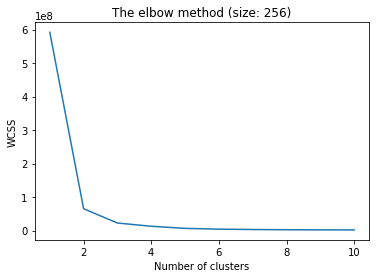

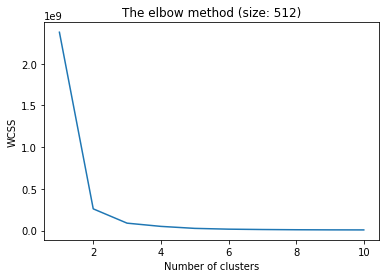

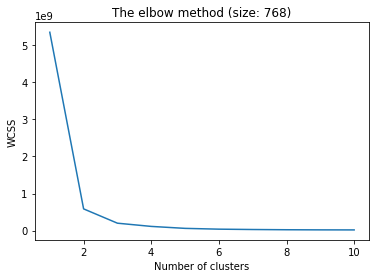

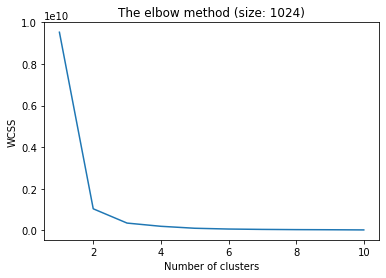

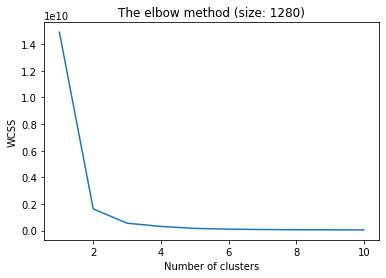

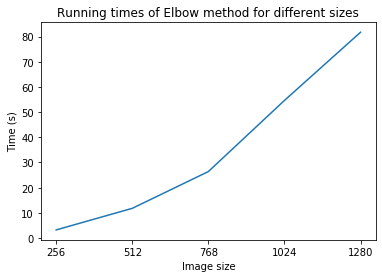

In [8]:
from matplotlib import pyplot as plt
import commonmethods.image_modification as im
import numpy as np
import cv2
import time

size_values = [256, 512, 768, 1024, 1280]
image = im.load_image_grayscale("5")
times = []

for size in size_values:
    resized_image = im.resize_image(image, size)
    # reshape the image to a 2D array of pixels and 1 color values
    pixel_values = resized_image.reshape((-1, 1))

    # convert to float
    pixel_values = np.float32(pixel_values)
    wcss = []   #within cluster sum of squares

    start = time.time()
    for k in range(1, 11):
        # define stopping criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
        wcss.append(compactness)
    end = time.time()

    e_time = end-start
    times.append(e_time)

    plt.plot(range(1, 11), wcss)
    plt.title('The elbow method (size: %i)' % size)
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') #within cluster sum of squares
    plt.show()
    
default_x_ticks = range(len(size_values))

plt.title('Running times of Elbow method for different sizes')

plt.plot(times)

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.show()

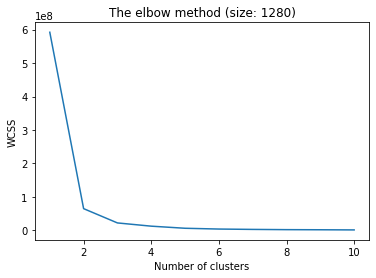

[592111692.9926517, 65040175.1316469, 22368431.527994625, 12697181.838022351, 6421002.76674933, 4082268.407918822, 3011870.848708424, 2296369.2402576334, 1955377.3110738348, 1491166.7789802754]


In [10]:
resized_image = im.resize_image(image, 256)

# reshape the image to a 2D array of pixels and 1 color values
pixel_values = resized_image.reshape((-1, 1))

# convert to float
pixel_values = np.float32(pixel_values)
wcss = []   #within cluster sum of squares

for k in range(1, 11):
    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    wcss.append(compactness)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method (size: %i)' % size)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

print(wcss)

In [14]:
for i in range(1, len(wcss)):
    print('clusters: ' + format(i) + ' - ' + format(i+1) + ' = ' + format(wcss[i-1]-wcss[i]))

clusters: 1 - 2 = 527071517.8610048
clusters: 2 - 3 = 42671743.603652276
clusters: 3 - 4 = 9671249.689972274
clusters: 4 - 5 = 6276179.071273021
clusters: 5 - 6 = 2338734.358830508
clusters: 6 - 7 = 1070397.5592103982
clusters: 7 - 8 = 715501.6084507904
clusters: 8 - 9 = 340991.9291837986
clusters: 9 - 10 = 464210.5320935594
